In [179]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [180]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

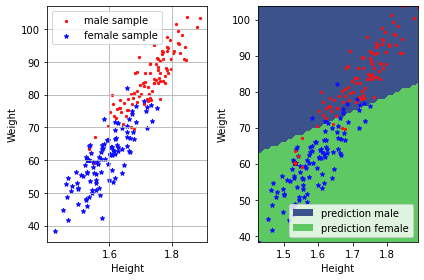

In [181]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    """Least square demo 

    Args:
        y:  shape=(N, 1)
        x:  shape=(N, 2)
    """
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    # w = least squares with respect to tx and y
    w, mse = least_squares(y, tx)
    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

#### The `least_square_classification_demo` is expected to show

![1](./classification_by_least_square.png)

## Logistic Regression

Compute your cost by negative log likelihood.

In [184]:
def sigmoid(t):
    """apply sigmoid function on t.

    Args:
        t: scalar or numpy array

    Returns:
        scalar or numpy array

    >>> sigmoid(np.array([0.1]))
    array([0.52497919])
    >>> sigmoid(np.array([0.1, 0.1]))
    array([0.52497919, 0.52497919])
    """

    sigmoid = 1/(1+(np.exp(-t)))
    
    return sigmoid

test(sigmoid)

✅ Your `sigmoid` passed 2 tests.


In [185]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        a non-negative loss

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(4).reshape(2, 2)
    >>> w = np.c_[[2., 3.]]
    >>> round(calculate_loss(y, tx, w), 8)
    1.52429481
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]
     
    N,D = tx.shape
    loss = 0.0 
    # for i in range(N):
        # loss+=(1/N)*(np.log(1+np.exp(tx[i,:].T.dot(w.reshape(-1))))-y[i][0]*(tx[i,:].T.dot(w.reshape(-1))))

    loss=np.sum((1/N)*(np.log(1+np.exp(tx.dot(w.reshape(-1))))-y.reshape(-1)*(tx.dot(w.reshape(-1)))))
   
    return loss

test(calculate_loss)

✅ Your `calculate_loss` passed 4 tests.


In [186]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss.
    
    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    N, D = tx.shape 
    y = y.reshape(-1); w = w.reshape(-1)
    gradient = (1/N)*tx.T.dot(sigmoid(tx.dot(w))-y).reshape(D,1)
    
    return gradient

test(calculate_gradient)

✅ Your `calculate_gradient` passed 5 tests.


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [187]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1) 

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    # compute gradient and loss
    gradient = calculate_gradient(y, tx, w)
    loss = calculate_loss(y, tx, w)
    
    # update w by gradient
    w = w - gamma*gradient

    return loss, w
    
test(learning_by_gradient_descent)

✅ Your `learning_by_gradient_descent` passed 7 tests.


Demo!

Current iteration=0, loss=0.6931471805599456
Current iteration=100, loss=0.25727807758229915
Current iteration=200, loss=0.2354612766230435
Current iteration=300, loss=0.22402749546644213
Current iteration=400, loss=0.217439348921451
Current iteration=500, loss=0.2133786620603055
Current iteration=600, loss=0.2107498111157124
Current iteration=700, loss=0.2089845098624057
Current iteration=800, loss=0.2077655124329582
Current iteration=900, loss=0.20690519298954657
Current iteration=1000, loss=0.20628738195411775
Current iteration=1100, loss=0.20583744941158433
Current iteration=1200, loss=0.20550598727687253
Current iteration=1300, loss=0.2052594634804288
Current iteration=1400, loss=0.20507464518877042
Current iteration=1500, loss=0.2049351533097044
Current iteration=1600, loss=0.20482926953052658
Current iteration=1700, loss=0.20474850436405462
Current iteration=1800, loss=0.2046866411426354
Current iteration=1900, loss=0.20463908531602837
Current iteration=2000, loss=0.204602414005

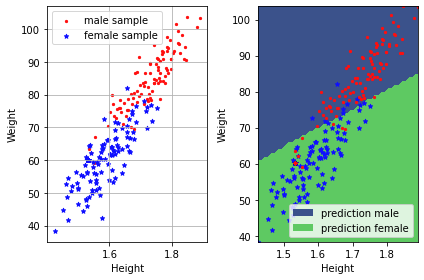

In [188]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.5
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

#### The `logistic_regression_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_gradient_descent.png)

Calculate your hessian below

In [193]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        a hessian matrix of shape=(D, D) 

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_hessian(y, tx, w)
    array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]])
    """
    N, D = tx.shape

    # sigmoid(tx.dot(w)).shape
    s = np.diag(np.diag(sigmoid(tx.dot(w)).dot((1-sigmoid(tx.dot(w))).T)))

    # s = np.zeros((N,N))
    # for i in range(N):
        # s[i, i] = sigmoid(tx[i,:].dot(w)).dot(1-(sigmoid(tx[i,:].T.dot(w))))

    Hessian = (tx.T.dot(s).dot(tx))/N

    return Hessian

test(calculate_hessian)

✅ Your `calculate_hessian` passed 4 tests.


Write a function below to return loss, gradient, and hessian.

In [194]:
def logistic_regression(y, tx, w):
    """return the loss, gradient of the loss, and hessian of the loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        loss: scalar number
        gradient: shape=(D, 1) 
        hessian: shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> loss, gradient, hessian = logistic_regression(y, tx, w)
    >>> round(loss, 8)
    0.62137268
    >>> gradient, hessian
    (array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]]), array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]]))
    """
    loss =  calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    Hessian = calculate_hessian(y, tx, w)
    return loss, gradient, Hessian
    
test(logistic_regression)

✅ Your `logistic_regression` passed 6 tests.


### Using Newton's method
Use Newton's method for logistic regression.

In [232]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step of Newton's method.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)
        
    >>> y = np.c_[[0., 0., 1., 1.]]
    >>> np.random.seed(0)
    >>> tx = np.random.rand(4, 3)
    >>> w = np.array([[0.1], [0.5], [0.5]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_newton_method(y, tx, w, gamma)
    >>> round(loss, 8)
    0.71692036
    >>> w
    array([[-1.31876014],
           [ 1.0590277 ],
           [ 0.80091466]])
    """
   
   
    # return loss, gradient and Hessian
    loss, gradient, hessian = logistic_regression(y, tx, w)

    # update w
    w = w - gamma*(np.linalg.inv(hessian).dot(gradient))
    # w = w-gamma*()
    return loss, w

test(learning_by_newton_method)

✅ Your `learning_by_newton_method` passed 8 tests.


demo

Current iteration=0, the loss=0.6931471805599456
Current iteration=1, the loss=0.317057768695479
Current iteration=2, the loss=0.23652293099675287
Current iteration=3, the loss=0.20998733711242235
Current iteration=4, the loss=0.20478199318618967
Current iteration=5, the loss=0.20447559968244788
Current iteration=6, the loss=0.2044741280881354
Current iteration=7, the loss=0.20447412804945292
loss=0.20447412804945292


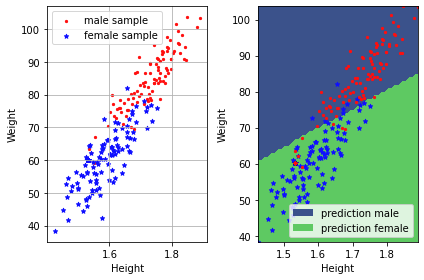

In [203]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))

        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

#### The `logistic_regression_newton_method_demo` is expected to show

![1](../template/classification_by_logistic_regression_newton_method.png)

### Using penalized logistic regression
Fill in the function below.

In [231]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss and gradient.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        lambda_: scalar

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    >>> round(loss, 8)
    0.63537268
    >>> gradient 
    array([[-0.08370763],
           [ 0.2467104 ],
           [ 0.57712843]])
    """
    N,D = tx.shape
    loss = 0.0 
    mle = np.sum((1/N)*(np.log(1+np.exp(tx.dot(w.reshape(-1))))-y.reshape(-1)*(tx.dot(w.reshape(-1)))))
    regu = (lambda_/2)*np.linalg.norm(w, ord=2)
    loss = mle + regu
    # loss = calculate_loss(y, tx, w)+(lambda_/2)*np.linalg.norm(w)
    # gradient = calculate_gradient(y, tx, w) + lambda_*np.linalg.norm(w)
    gradient = calculate_gradient(y, tx, w) + lambda_*w

    # N, D = tx.shape 
    # y = y.reshape(-1); w = w.reshape(-1)
    # gradient = (1/N)*tx.T.dot(sigmoid(tx.dot(w))-y).reshape(D,1)

    return loss, gradient

test(penalized_logistic_regression)

❌ The are some issues with your implementation of `penalized_logistic_regression`:
**********************************************************************
File "__main__", line 19, in penalized_logistic_regression
Failed example:
    round(loss, 8)
Expected:
    0.63537268
Got:
    0.64008097
**********************************************************************
File "__main__", line 21, in penalized_logistic_regression
Failed example:
    gradient 
Expected:
    array([[-0.08370763],
           [ 0.2467104 ],
           [ 0.57712843]])
Got:
    array([[-0.09370763],
           [ 0.2267104 ],
           [ 0.54712843]])
**********************************************************************


In [228]:
w = np.array([[0.1], [0.2], [0.3]])
lambda_ = 0.1
print(np.linalg.norm(w, ord=1))
print(np.linalg.norm(w, ord=2))


0.6000000000000001
0.3741657386773941


In [215]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar
        lambda_: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> gamma = 0.1
    >>> loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
    >>> round(loss, 8)
    0.63537268
    >>> w
    array([[0.10837076],
           [0.17532896],
           [0.24228716]])
    """

    # loss, gradient
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
   
    # update w
    w = w - gamma*gradient
   
    return loss, w
    
test(learning_by_penalized_gradient)

❌ The are some issues with your implementation of `learning_by_penalized_gradient`:
**********************************************************************
File "__main__", line 24, in learning_by_penalized_gradient
Failed example:
    round(loss, 8)
Expected:
    0.63537268
Got:
    0.64008097
**********************************************************************
File "__main__", line 26, in learning_by_penalized_gradient
Failed example:
    w
Expected:
    array([[0.10837076],
           [0.17532896],
           [0.24228716]])
Got:
    array([[0.10937076],
           [0.17732896],
           [0.24528716]])
**********************************************************************


Current iteration=0, loss=0.6931471805599456
Current iteration=100, loss=0.2584874984463755
Current iteration=200, loss=0.23743110750790544
Current iteration=300, loss=0.22657963812125168
Current iteration=400, loss=0.22038599261294503
Current iteration=500, loss=0.21658464186332185
Current iteration=600, loss=0.21412170001418543
Current iteration=700, loss=0.21245783248562458
Current iteration=800, loss=0.21129577738704583
Current iteration=900, loss=0.2104618631960926
Current iteration=1000, loss=0.20984977031269908
Current iteration=1100, loss=0.20939186848958183
Current iteration=1200, loss=0.20904373374521215
Current iteration=1300, loss=0.20877537281022113
Current iteration=1400, loss=0.20856604529203435
Current iteration=1500, loss=0.20840110283776825
Current iteration=1600, loss=0.20827000243775634
Current iteration=1700, loss=0.20816502563403713
Current iteration=1800, loss=0.20808043414196098
Current iteration=1900, loss=0.2080119019384619
Current iteration=2000, loss=0.20795

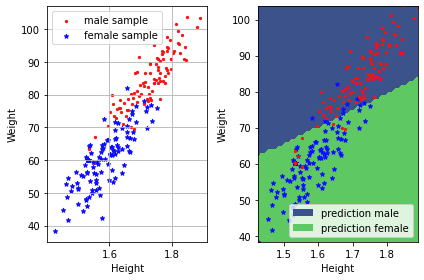

In [216]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.5
    lambda_ = 0.0005
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

#### The `logistic_regression_penalized_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_penalized_gradient_descent.png)